## Crime Analytics

## Communicating Data Science Results 
#### by University of Washington

The Visual crime analysis will analyze criminal incident data from Seattle and San Francisco for the period of June, July, and August 2014.

The analysis will try to answer, mainly visually, to the following questions:

##### 1.How do incidents vary month to month in the Summer 2014 dataset?
##### 2.Which incident types tend to correlate with each other on a day-by-day basis?
##### 3. How do incidents vary by time of day? Which incidents are most common in the evening? During what periods of the day are robberies most common?
##### 4. What can we infer broadly about the differences in crime patterns between Seattle and San Francisco? Does one city tend to have more crime than the other, per capita? Do the relative frequencies of types of incidents change materially between the two cities?
##### 5. Do certain crimes correlate with environmental factors such as temperature? 


### Data collection and cleaning
These reduced datasets are available on the [course github repository](https://github.com/uwescience/datasci_course_materials/tree/master/assignment6)
##### Seattle Data :
[Seattle Summer 2014 dataset](https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/seattle_incidents_summer_2014.csv)
##### San Francisco Data :
[San Francisco Summer 2014 dataset](https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/sanfrancisco_incidents_summer_2014.csv)

All datasets are provided through their respective cities data portals, all powered by [Socrata](https://www.socrata.com/). The three portals and the links to the original datasets are

In particular, to answer to some of this questions, some external data are required, namely: temperature for summer 2014 and population for both cities.

The temperature for Seattle data are collected from:
###### [National Weather Service](http://w2.weather.gov/climate/index.php?wfo=sew) , 
while the temperature data for San Francisco are collected from:
###### [US Climate Data](http://www.usclimatedata.com/climate/san-francisco/california/united-states/usca0987/2014/8) , 
setting the month as the last character into the link provided.

The files are loaded and the temperatures are normalized for both, computing the average temperature for Seattle from the min and max values, and then using the average daily temperature for each month to fill some empty values.
In addition to keep both dataset comparables, a normalization is performed in the Category or Summarized.Offense.Description that ar eplanned to be used for visualizatoin analytics.

###### How Category normalizatoin is performed
In the original datasets, a number of category classification were not overlapping, and in addition San Francisco had fewer categories then Seattle. The strategy adopted had been to start from the fewer categories of San Francisco and attach every category from Seattle to one of them. This left the set of San Francisco with some more categories in respect to Seattle, so a second step of normalizatoin on San Francisco categories  is performed, until both set have exactly the same categories.

The logic adopted to link categories  with different name, in some cases lie on personal interpretation as this is inavoidable, if we don't imagine a complex Natural Language Processing step that is not the target for this work.
Therefore some categories unclassified in the other dataset, are linked to the most general category where needed, e.g. "OTHER OFFENSES", already present in the San Francisco records, while the common sense was used in case of simpler interpretations.




In [3]:
Sys.setlocale("LC_TIME", "English")
options(jupyter.plot_mimetypes = 'image/png')
#setwd("E:/MEGA/Git Repository/datasci_course_materials/assignment6")        
crisan  <- read.csv("sanfrancisco_incidents_summer_2014.csv", header = T)     
crisea  <- read.csv("seattle_incidents_summer_2014.csv", header = T)   
tempsan <- read.csv("SeattleTemp.csv", header = T, sep=";")     
tempsea <- read.csv("SanFranciscoTemp.csv", header = T, sep=";")   
tempsea$TempAvg <- round((tempsea$TempMin+tempsea$TempMax)/2,0)

# mean temp of June
meanJune <- round(mean(tempsea[substr(tempsea$Date,1,2)=="06"&tempsea$TempAvg!=0,]$TempAvg),0)
# Update June when temp = 0
tempsea[substr(tempsea$Date,1,2)=="06"&tempsea$TempAvg==0,]$TempAvg <- meanJune

# mean temp of July
meanJuly <- round(mean(tempsea[substr(tempsea$Date,1,2)=="07"&tempsea$TempAvg!=0,]$TempAvg),0)
# Update July when temp = 0
tempsea[substr(tempsea$Date,1,2)=="07"&tempsea$TempAvg==0,]$TempAvg <- meanJuly

# mean temp of Agust
meanAgust <- round(mean(tempsea[substr(tempsea$Date,1,2)=="08"&tempsea$TempAvg!=0,]$TempAvg),0)
# Update Agust when temp = 0
tempsea[substr(tempsea$Date,1,2)=="08"&tempsea$TempAvg==0,]$TempAvg <- meanAgust

tempsea$TempMin <- NULL
tempsea$TempMax <- NULL
#str(crisan)
#str(crisea)
crisea$Date <- as.factor(substr(as.character(crisea$Occurred.Date.or.Date.Range.Start), 1, 10))
crisea$Time <- as.factor(substr(as.character(crisea$Occurred.Date.or.Date.Range.Start), 12, 16))
crisea <- merge(x = crisea, y = tempsea, by = "Date")
crisan <- merge(x = crisan, y = tempsan, by = "Date")
crisea$DayOfWeek <- weekdays(as.Date(crisea$Date,'%m/%d/%Y'))
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="INJURY"] <- "ASSAULT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="HOMICIDE"] <- "ASSAULT"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="BURGLARY-SECURE PARKING-RES"] <- "BURGLARY"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="TRESPASS"] <- "BURGLARY"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="PUBLIC NUISANCE"] <- "DISORDERLY CONDUCT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="THREATS"] <- "DISORDERLY CONDUCT"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="DUI"] <- "DRIVING UNDER THE INFLUENCE"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="NARCOTICS"] <- "DRUG/NARCOTIC"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="TRAFFIC"] <- "DRUG/NARCOTIC"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="EMBEZZLE"] <- "EMBEZZLEMENT"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="COUNTERFEIT"] <- "FORGERY/COUNTERFEITING"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="FORGERY"]   <- "FORGERY/COUNTERFEITING"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="MAIL THEFT"] <- "LARCENY/THEFT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="PICKPOCKET"] <- "LARCENY/THEFT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="PURSE SNATCH"] <- "LARCENY/THEFT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="SHOPLIFTING"] <- "LARCENY/THEFT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="STOLEN PROPERTY"] <- "LARCENY/THEFT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="THEFT OF SERVICES"] <- "LARCENY/THEFT"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="LIQUOR VIOLATION"] <- "LIQUOR LAWS"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="LOST PROPERTY"] <- "NON-CRIMINAL"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="RECOVERED PROPERTY"] <- "NON-CRIMINAL"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="ANIMAL COMPLAINT"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="BIAS INCIDENT"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="CAR PROWL"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="DISPUTE"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="DISTURBANCE"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="FALSE REPORT"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="FIREWORK"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="[INC - CASE DC USE ONLY]"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="ILLEGAL DUMPING"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="OBSTRUCT"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="OTHER PROPERTY"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="VIOLATION OF COURT ORDER"] <- "OTHER OFFENSES"


levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="PORNOGRAPHY"] <- "PORNOGRAPHY/OBSCENE MAT"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="ELUDING"] <- "RUNAWAY"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="ESCAPE"] <- "RUNAWAY"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="PROPERTY DAMAGE"] <- "VANDALISM"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="BIKE THEFT"] <- "VEHICLE THEFT"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="WARRANT ARREST"] <- "WARRANTS"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="WEAPON"] <- "WEAPON LAWS"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="RECKLESS BURNING"] <- "ARSON"

levels(crisan$Category)[levels(crisan$Category)=="BRIBERY"] <- "EMBEZZLEMENT"
levels(crisan$Category)[levels(crisan$Category)=="EXTORTION"] <- "EMBEZZLEMENT"
levels(crisan$Category)[levels(crisan$Category)=="DRUNKENNESS"] <- "DISORDERLY CONDUCT"
levels(crisan$Category)[levels(crisan$Category)=="FAMILY OFFENSES"] <- "DISORDERLY CONDUCT"
levels(crisan$Category)[levels(crisan$Category)=="SUSPICIOUS OCC"] <- "DISORDERLY CONDUCT"
levels(crisan$Category)[levels(crisan$Category)=="KIDNAPPING"] <- "ASSAULT"
levels(crisan$Category)[levels(crisan$Category)=="GAMBLING"] <- "SECONDARY CODES"
levels(crisan$Category)[levels(crisan$Category)=="LOITERING"] <- "SECONDARY CODES"
levels(crisan$Category)[levels(crisan$Category)=="MISSING PERSON"] <- "SECONDARY CODES"
levels(crisan$Category)[levels(crisan$Category)=="SECONDARY CODES"] <- "OTHER OFFENSES"
levels(crisan$Category)[levels(crisan$Category)=="STOLEN PROPERTY"] <- "OTHER OFFENSES"
levels(crisan$Category)[levels(crisan$Category)=="SUICIDE"] <- "OTHER OFFENSES"
levels(crisan$Category)[levels(crisan$Category)=="TRESPASS"] <- "RUNAWAY"

#sort(levels(crisea$Summarized.Offense.Description)) == sort(levels(crisan$Category))


[1] "English_United States.1252"

##### Question n.1: How do incidents vary month to month in the Summer 2014 dataset?
We have two dimension here, one for the Month and one for the total incidents per Month, both mapped to space.

In [27]:
# Normalizing months and number ov events
crisea$monthLabel <- months(as.Date(crisea$Date,'%m/%d/%Y'))
crisan$monthLabel <- months(as.Date(crisan$Date,'%m/%d/%Y'))
# count the timestamps per month for each year
library(plyr)
seaNEvents= count(crisea, vars = c("monthLabel"))
sanNEvents= count(crisan, vars = c("monthLabel"))


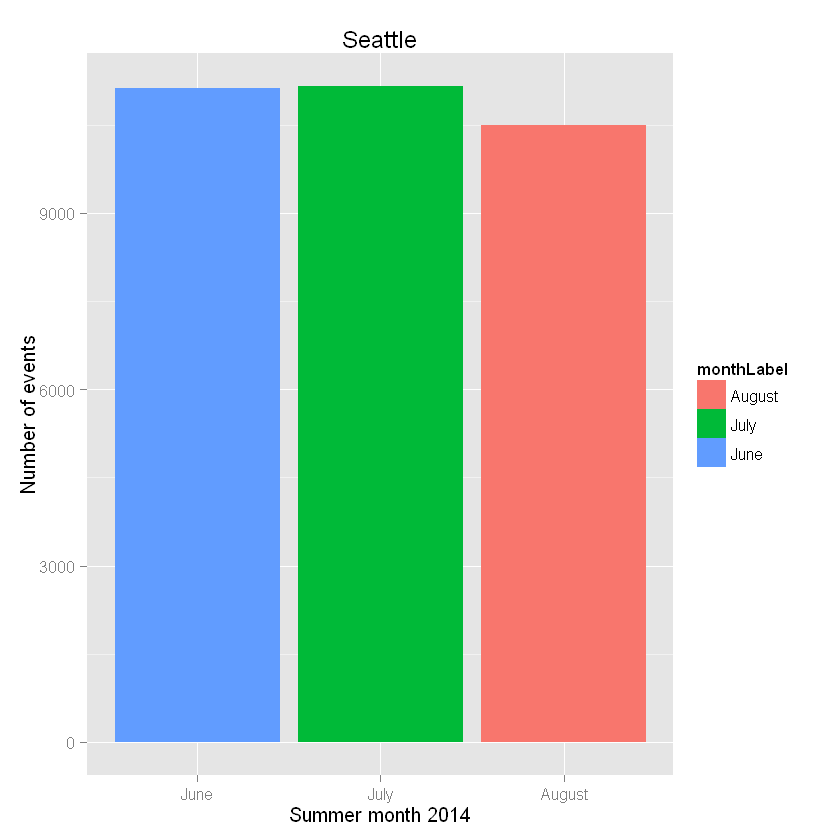

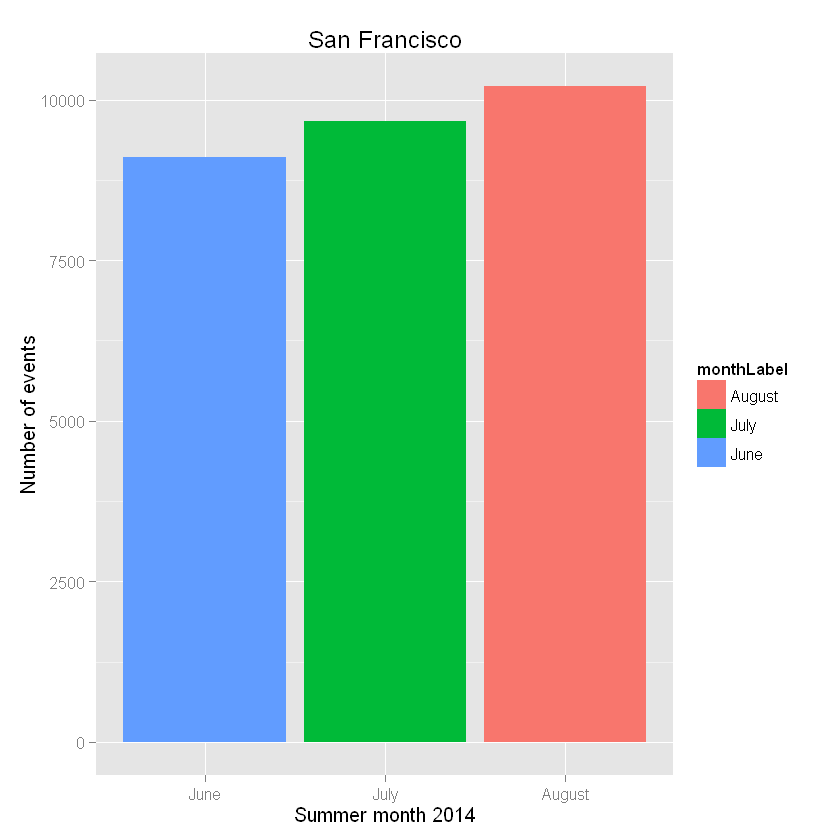

In [59]:
library(ggplot2)
ggplot(data = seaNEvents) + 
    geom_bar(aes(x = factor(monthLabel, levels=c("June","July","August")), 
                 y = freq, fill = monthLabel), 
             stat="identity", 
             position = "dodge") +
    xlab("Summer month 2014") +
    ylab("Number of events")  +
    ggtitle("Seattle")  
ggplot(data = sanNEvents) + 
    geom_bar(aes(x = factor(monthLabel, levels=c("June","July","August")), 
                 y = freq, fill = monthLabel), 
             stat="identity", 
             position = "dodge") +
    xlab("Summer month 2014") +
    ylab("Number of events")  +
    ggtitle("San Francisco")

